___

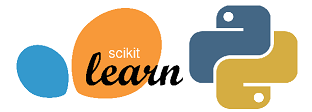
___
# Ejercicio de Regresión Lineal - Parte 2

¡Felicidades! Acabas de obtener un contrato de trabajo con una empresa de comercio electrónico con sede en la ciudad de Nueva York que vende ropa en línea, pero también tienen sesiones de asesoramiento de estilo y ropa en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden ir a casa y pedir en una aplicación móvil o en un sitio web la ropa que desean.

La compañía está tratando de decidir si enfocar sus esfuerzos en su experiencia con la aplicación móvil o en su sitio web. ¡Te han contratado para ayudarlos a resolverlo! ¡Empecemos!

Simplemente sigue los pasos a continuación para analizar los datos del cliente (no te preocupes, todos los datos son ficticios para efectos de este ejercicio).

## Importaciones
**Importa pandas, numpy, matplotlib y seaborn. Luego configura % matplotlib en línea
(Importarás sklearn cuando lo necesite).**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## Obtener los datos

Trabajaremos con el archivo csv Ecommerce Customers de la empresa. Tiene información del cliente, como correo electrónico, dirección y su avatar de color. Luego también tiene columnas de valor numérico:

* Avg. Session Length: Media de sesiones de asesoramiento de estilo en tienda.
* Time on App: Tiempo medio dedicado a la aplicación en minutos.
* Time on Website: Tiempo promedio empleado en el sitio web en minutos.
* Length of Membership: Cuántos años ha sido miembro el cliente. 

** Leer el archivo csv Ecommerce Customers y cargarlo en el DataFrame llamado clientes.**

In [2]:
clientes = pd.read_csv('Ecommerce Customers')

**Verifica los 5 primeros registros del df clientes, luego visualiza su informacion con los metodos info() y describe()**

In [6]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análisis Exploratorio de los Datos

**Exploremos los datos!**

Durante el resto del ejercicio, solo usaremos los datos numéricos del archivo csv.
___
**Utiliza seaborn para crear un jointplot para comparar las columnas de el tiempo de permanencia en la website (Time on Website) y el importe gastado anualmente (Yearly Amount Spent). ¿Tiene sentido la correlación?**

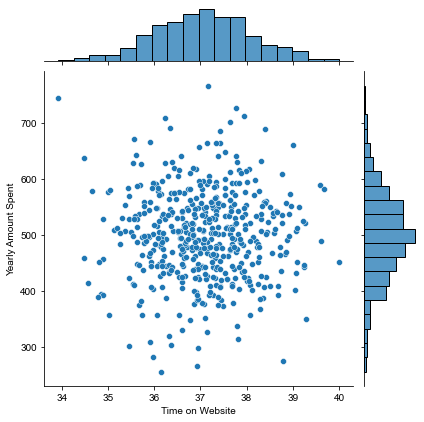

In [8]:
#Puedes asignar un color de paleta distinto, revisa los detalles en este enlace
# https://seaborn.pydata.org/generated/seaborn.mpl_palette.html
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)
#sns.set_palette("GnBu_d")
sns.set_palette("seismic")
sns.set_style('whitegrid')

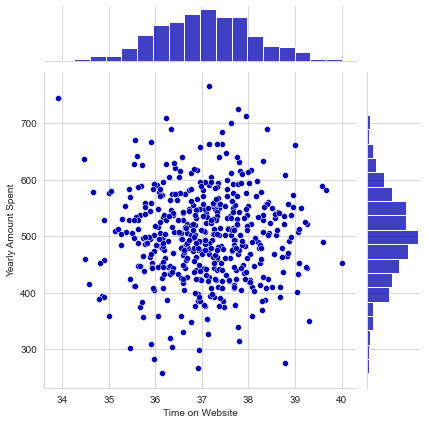

In [19]:
# A Mas tiempo en el sitio web, mas dinero gasta.
"""Se puede apreciar que existen datos muy diversos en la gráfica."""

**Hacer lo mismo pero ahora con la columna Tiempo en la aplicación (Time on App)**

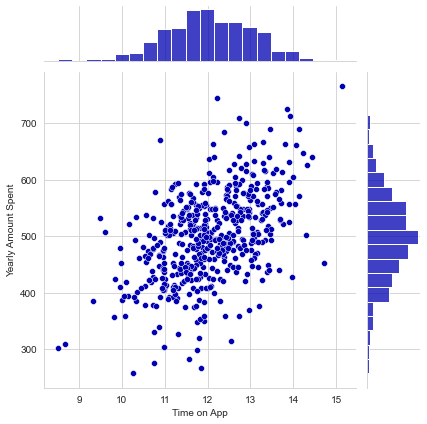

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)
"""Se puede apreciar que existe un mejor relación de 'Time on App' que el 'Time on Website' con la variable 'Yearly amount spent'"""

**Use un jointplot para crear un gráfico 2D hex que compare el tiempo en la aplicación (Time on App) y la duración de la membresía (Length of Membership).**

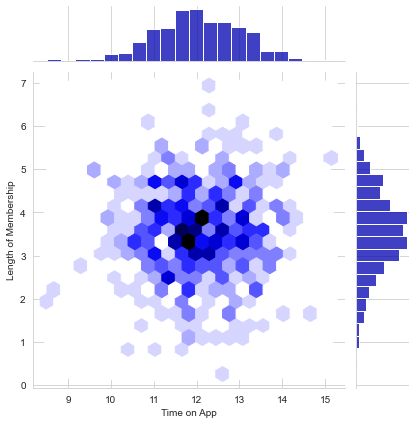

In [13]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

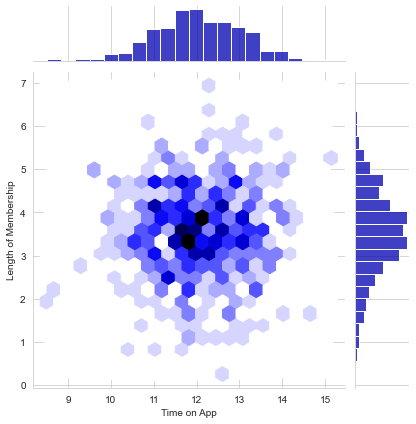

**Exploremos estos tipos de relaciones en todo el conjunto de datos. Utiliza el diagrama [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recrear el diagrama a continuación (no te preocupes por los colores).**

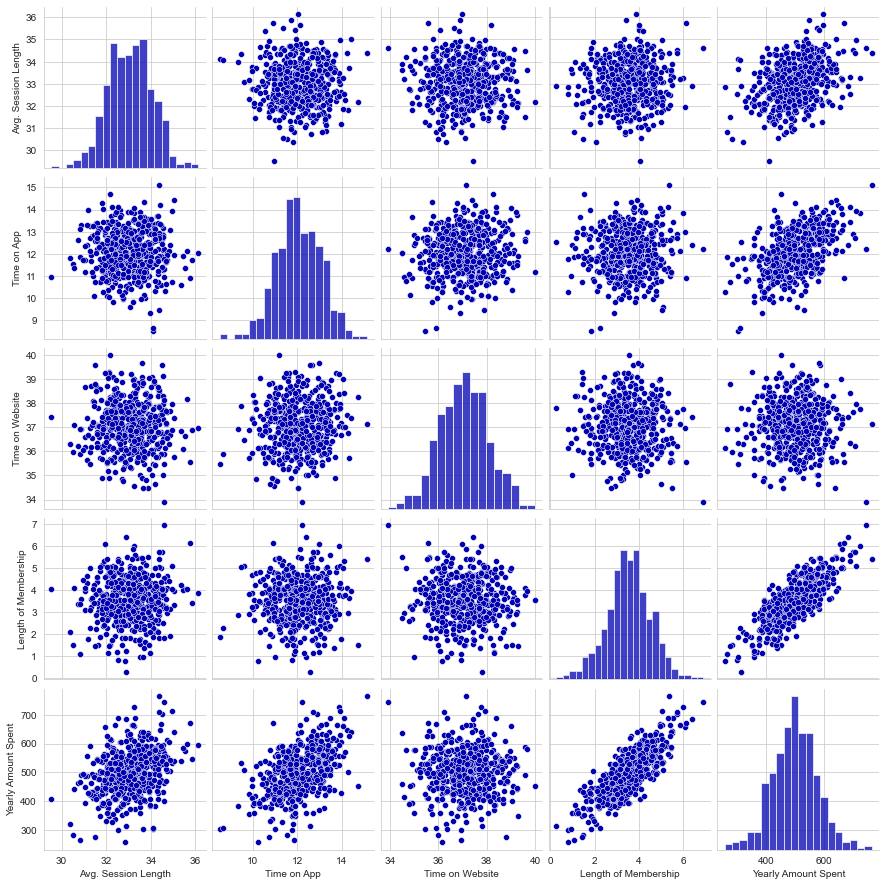

In [14]:
sns.pairplot(data=clientes)

**Con base en este gráfico, ¿cuál parece ser la característica más correlacionada con la cantidad anual gastada?**

In [285]:
"""En base al gráfico anterior, la característica más correlacionada con la cantidad anual gastada es Length of Membership"""

**Cree una gráfica de modelo lineal (utilizando el lmplot de seaborn) de la cantidad anual gastada (Yearly Amount Spent) vs. la duración de la membresía (Length of Membership).**

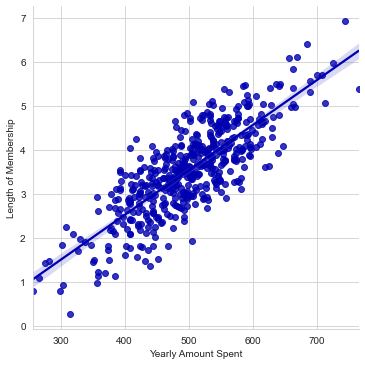

In [16]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=clientes)

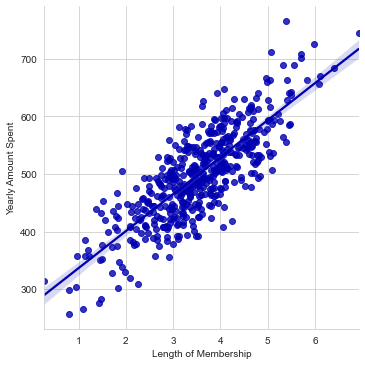

## Datos de entrenamiento y prueba

Ahora que hemos explorado un poco los datos, sigamos adelante y dividamos los datos en conjuntos de entrenamiento y prueba.
**Establezca una variable 'X' igual a las características numéricas de los clientes y una variable 'y' igual a la columna "Monto gastado anual" (Yearly Amount Spent).**

In [17]:
X = clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = clientes['Yearly Amount Spent']

**Utiliza model_selection.train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba. Establece test_size = 0.3 y random_state = 101**

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=101)

## Entrenando el Modelo

¡Ahora es el momento de entrenar el modelo con nuestros datos de entrenamiento!

**Importar LinearRegression from sklearn.linear_model**

In [20]:
from sklearn.linear_model import LinearRegression

**Crear una instancia de un modelo de LinearRegression() llamado lm.**

In [21]:
lm = LinearRegression()

**Entrenar/ajustar (Train/fit) el modelo de regresion lineal 'lm' con los datos de entrenamiento.**

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

**Imprime los coeficientes del modelo**

In [23]:
slope = lm.coef_
print('Coeficientes')
print(slope)

Coeficientes
[25.98154972 38.59015875  0.19040528 61.27909654]


In [25]:
coef_df = pd.DataFrame(lm.coef_, index = X.columns, columns= ['Coeficiente'])
coef_df

,Coeficiente
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Parte 2
## Predicción de datos de prueba
Ahora que hemos ajustado nuestro modelo, ¡evaluemos su rendimiento prediciendo los valores de prueba!

**Utilice lm.predict() para predecir el conjunto de datos X_test.**

In [26]:
predictions = lm.predict(X_test)

**Crear una gráfica de dispersión de los valores de prueba reales frente a los valores predichos.**

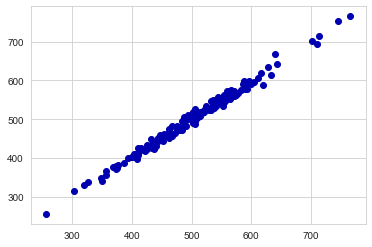

In [27]:
plt.scatter(y_test, predictions)

Text(0, 0.5, 'Y Predichos')

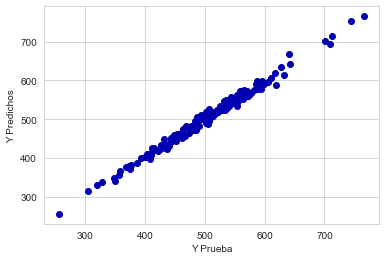

## Evaluando el Modelo

Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

**Calcule el error medio absoluto, el error cuadrático medio y la raíz del error cuadrático medio. Consulte la conferencia o Wikipedia para conocer las fórmulas.**

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


In [35]:
# calcular estas métricas a mano!


MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


## Residuales

Deberías haber obtenido un modelo muy bueno con un buen ajuste. Exploremos rápidamente los residuos para asegurarnos de que todo esté bien con nuestros datos.

**Trace un histograma de los residuos y asegúrese de que parezca distribuido normalmente. Utilice la grafica de seaborn displot() o simplemente plt.hist ().**

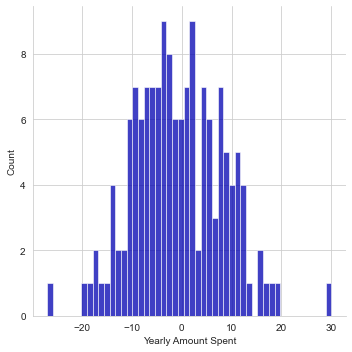

In [30]:
sns.displot((y_test-predictions), bins=50)

In [ ]:
""""Esto refleja que hay una campana, donde la se encuentra mayor concentración cerca a la variable cero"""

## Conclusión
Todavía queremos encontrar la respuesta a la pregunta original, ¿enfocamos nuestro esfuerzo en el desarrollo de aplicaciones móviles o sitios web? O tal vez eso ni siquiera importa, y el tiempo de membresía es lo realmente importante. Veamos si podemos interpretar los coeficientes para tener una idea.

**Recrea el dataframe a continuación.**

In [32]:
coef_df = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coeficiente'])
coef_df

,Coeficiente
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**¿Cómo interpretar estos coeficientes?**

Interpretación de los coeficientes:

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Avg. Session Length** está asociada con un **aumento de 25,98 dólares gastados**.
- Manteniendo todas las demás funciones fijas, un aumento de 1 unidad en **Time on App** se asocia con un **aumento de 38.59 dólares totales gastados**.
- Manteniendo todas las demás funciones fijas, un aumento de 1 unidad en **Time on Website** se asocia con un **aumento de 0,19 dólares totales gastados**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Length of Membership** se asocia con un **aumento de 61,27 dólares totales gastados**.

**¿Crees que la empresa debería centrarse más en su aplicación móvil o en su sitio web?**

In [ ]:
""" Dado el resultado que arroja el modelo, la empresa debería dedicar sus esfuerzos más en el tiempo de membresía, ya que esta última arroja mejores ganancias para la empresa, luego se piede implementar mejoras en el tiempo en la aplicación, sin embargo, implementar mejoras en el tiempo en website, sería un gasto sin buenos resultados, como si los brindaría un enfoque en el tiempo de membresía """.

## Buen trabajo!

¡Felicitaciones por su contrato de trabajo! ¡A la empresa le encantó la información!